In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
with open('clean1.json') as f:
  telegramJson = json.load(f)

In [3]:
len(telegramJson)

227326

In [4]:
#sample text message

telegramJson[2]

{'id': 752962,
 'type': 'message',
 'date': '2017-04-09T11:40:37',
 'edited': '1970-01-01T07:30:00',
 'from': 'Chekwei',
 'from_id': 63910289,
 'text': "Omggg I don't want to wake up, feeling like DEATH"}

In [5]:
type(telegramJson)

list

In [6]:
df = pd.DataFrame(telegramJson)

In [7]:
df.columns

Index(['id', 'type', 'date', 'edited', 'from', 'from_id', 'text',
       'reply_to_message_id', 'photo', 'width', 'height', 'file', 'thumbnail',
       'media_type', 'sticker_emoji', 'mime_type', 'duration_seconds',
       'forwarded_from', 'via_bot', 'contact_information', 'actor', 'actor_id',
       'action', 'discard_reason', 'location_information',
       'live_location_period_seconds', 'contact_vcard', 'poll'],
      dtype='object')

In [8]:
df.head(5)

,id,type,date,edited,from,from_id,text,reply_to_message_id,photo,width,...,via_bot,contact_information,actor,actor_id,action,discard_reason,location_information,live_location_period_seconds,contact_vcard,poll
0,752960,message,2017-04-09T10:22:29,1970-01-01T07:30:00,BBCheng😘💓,44420247.0,"Hello, Jiayin here! Cute pic there btw hahaha",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,752961,message,2017-04-09T11:40:25,1970-01-01T07:30:00,Chekwei,63910289.0,HEYHEYHEY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,752962,message,2017-04-09T11:40:37,1970-01-01T07:30:00,Chekwei,63910289.0,"Omggg I don't want to wake up, feeling like DEATH",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,752963,message,2017-04-09T11:45:38,1970-01-01T07:30:00,BBCheng😘💓,44420247.0,Hahaha!! What time did you studied till?,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,752964,message,2017-04-09T12:22:29,1970-01-01T07:30:00,Chekwei,63910289.0,I slept at 630!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#renaming partner's name to proper naming for easy analysis (without emoji)

df['from'].replace('BBCheng😘💓', 'Jiayin', inplace=True)

In [10]:
#removing unnecessary features from raw json

df.drop(['reply_to_message_id', 'edited','photo', 'width', 'height', 'file', 'thumbnail',
       'media_type', 'sticker_emoji', 'mime_type', 'duration_seconds',
       'forwarded_from', 'via_bot', 'contact_information', 'actor', 'actor_id',
       'action', 'discard_reason', 'location_information',
       'live_location_period_seconds', 'contact_vcard', 'poll'], axis=1, inplace=True)

In [11]:
df.head()

,id,type,date,from,from_id,text
0,752960,message,2017-04-09T10:22:29,Jiayin,44420247.0,"Hello, Jiayin here! Cute pic there btw hahaha"
1,752961,message,2017-04-09T11:40:25,Chekwei,63910289.0,HEYHEYHEY
2,752962,message,2017-04-09T11:40:37,Chekwei,63910289.0,"Omggg I don't want to wake up, feeling like DEATH"
3,752963,message,2017-04-09T11:45:38,Jiayin,44420247.0,Hahaha!! What time did you studied till?
4,752964,message,2017-04-09T12:22:29,Chekwei,63910289.0,I slept at 630!


In [12]:
total = len(df)
print(total)

227326


# EDA on counts over the Days, Months, Years

In [13]:
#creating new feature (year) for easy analysis

df['year'] = df['date'].astype(str).str[0:4]

In [14]:
df.head()

,id,type,date,from,from_id,text,year
0,752960,message,2017-04-09T10:22:29,Jiayin,44420247.0,"Hello, Jiayin here! Cute pic there btw hahaha",2017
1,752961,message,2017-04-09T11:40:25,Chekwei,63910289.0,HEYHEYHEY,2017
2,752962,message,2017-04-09T11:40:37,Chekwei,63910289.0,"Omggg I don't want to wake up, feeling like DEATH",2017
3,752963,message,2017-04-09T11:45:38,Jiayin,44420247.0,Hahaha!! What time did you studied till?,2017
4,752964,message,2017-04-09T12:22:29,Chekwei,63910289.0,I slept at 630!,2017


Text(0, 0.5, 'Messages')

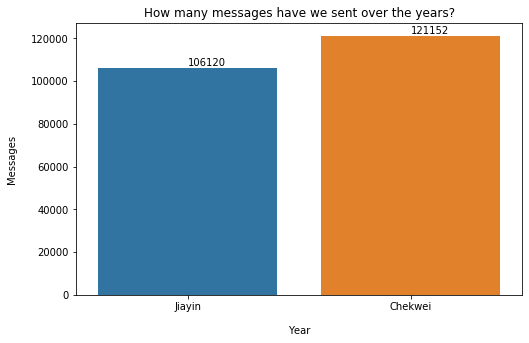

In [15]:
# How many messages have we sent over the years?

xpos = 'center'
offset = {'center': 0.5}
plt.figure(figsize=(8,5))
ax = sns.countplot('from', data=df)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() * offset[xpos], 1 * height, '{}'.format(height), va='bottom', fontsize=10)


plt.title('How many messages have we sent over the years?', fontsize = 12)
plt.xlabel("Year", labelpad=14)
plt.ylabel("Messages", labelpad=14)

Text(0, 0.5, 'Messages')

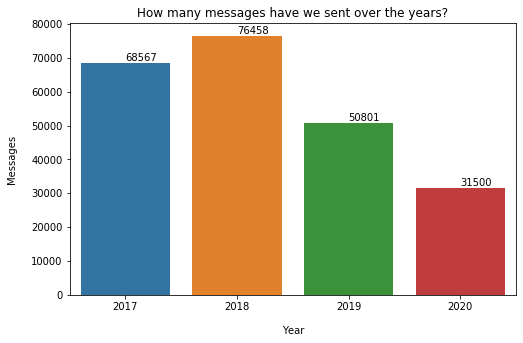

In [16]:
# How many messages have we sent over the years?

xpos = 'center'
offset = {'center': 0.5}
plt.figure(figsize=(8,5))
ax = sns.countplot('year', data=df)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() * offset[xpos], 1 * height, '{}'.format(height), va='bottom', fontsize=10)


plt.title('How many messages have we sent over the years?', fontsize = 12)
plt.xlabel("Year", labelpad=14)
plt.ylabel("Messages", labelpad=14)

Text(0, 0.5, 'Messages')

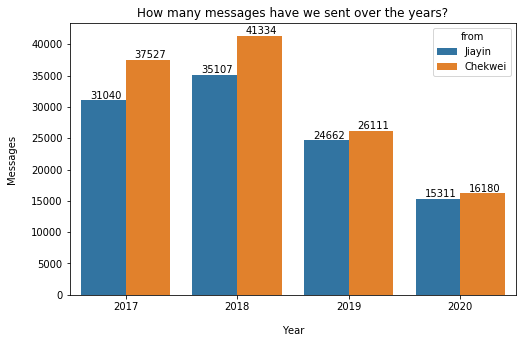

In [17]:
# How many messages have we sent over the years?

xpos = 'center'
offset = {'center': 0.2}
plt.figure(figsize=(8,5))
ax = sns.countplot('year', data=df, hue='from')

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() * offset[xpos], 1 * height, '{}'.format(height), va='bottom', fontsize=10)


plt.title('How many messages have we sent over the years?', fontsize = 12)
plt.xlabel("Year", labelpad=14)
plt.ylabel("Messages", labelpad=14)

# EDA deep dive by analysing Months and Years

In [18]:
# creating new feature (month) for easy analysis

df['month'] = df['date'].astype(str).str[5:7]

In [19]:
df.head()

,id,type,date,from,from_id,text,year,month
0,752960,message,2017-04-09T10:22:29,Jiayin,44420247.0,"Hello, Jiayin here! Cute pic there btw hahaha",2017,04
1,752961,message,2017-04-09T11:40:25,Chekwei,63910289.0,HEYHEYHEY,2017,04
2,752962,message,2017-04-09T11:40:37,Chekwei,63910289.0,"Omggg I don't want to wake up, feeling like DEATH",2017,04
3,752963,message,2017-04-09T11:45:38,Jiayin,44420247.0,Hahaha!! What time did you studied till?,2017,04
4,752964,message,2017-04-09T12:22:29,Chekwei,63910289.0,I slept at 630!,2017,04


In [ ]:
""""
#creating new feature (Month2) for easy analysis and reading - eg. Apr, May, Jun
monthMap = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug', '09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
df['month2'] = df['month'].map(monthMap)
df.drop(['month'], axis=1, inplace=True)
df.rename(columns={'month2':'month'}, inplace=True)
""""

In [20]:
# creating simple pd DF with 12 months of counts across the 3 years of data

year2017bymonth = pd.DataFrame(df[df['year']=='2017']['id'].groupby(df['month']).count())
year2018bymonth = pd.DataFrame(df[df['year']=='2018']['id'].groupby(df['month']).count())
year2019bymonth = pd.DataFrame(df[df['year']=='2019']['id'].groupby(df['month']).count())
year2017bymonth = year2017bymonth.reset_index()
year2018bymonth = year2018bymonth.reset_index()
year2019bymonth = year2019bymonth.reset_index()

Text(0.5, 1.0, 'Total number of messages sent by months in 2017')

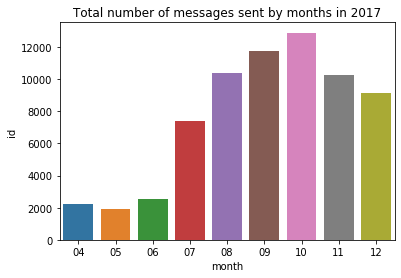

In [21]:
# Total number of messages sent by months in 2017

sns.barplot(x="month", y="id", data=year2017bymonth)
plt.title('Total number of messages sent by months in 2017', fontsize = 12)

Text(0.5, 1.0, 'Total number of messages sent by months in 2018')

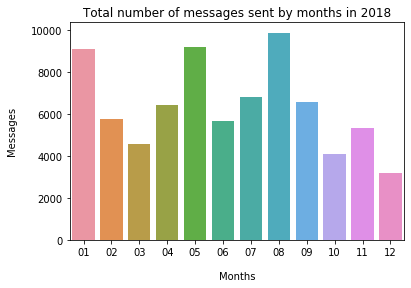

In [23]:
# Total number of messages sent by months in 2018

sns.barplot(x="month", y="id", data=year2018bymonth)
plt.xlabel("Months", labelpad=14)
plt.ylabel("Messages", labelpad=14)
plt.title('Total number of messages sent by months in 2018', fontsize = 12)

Text(0.5, 1.0, 'Total number of messages sent by months in 2019')

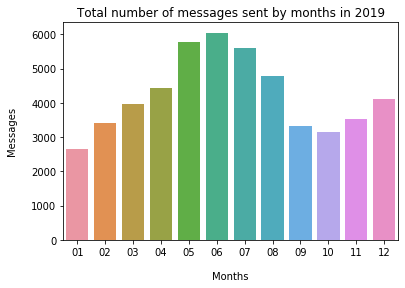

In [25]:
# Total number of messages sent by months in 2019

sns.barplot(x="month", y="id", data=year2019bymonth)
plt.xlabel("Months", labelpad=14)
plt.ylabel("Messages", labelpad=14)
plt.title('Total number of messages sent by months in 2019', fontsize = 12)

# EDA deep dive by analysing Hours/Time of the day

In [26]:
# creating new feature (hour) for easy analysis

df['hour'] = df['date'].astype(str).str[11:13]

In [27]:
df.head()

,id,type,date,from,from_id,text,year,month,hour
0,752960,message,2017-04-09T10:22:29,Jiayin,44420247.0,"Hello, Jiayin here! Cute pic there btw hahaha",2017,04,10
1,752961,message,2017-04-09T11:40:25,Chekwei,63910289.0,HEYHEYHEY,2017,04,11
2,752962,message,2017-04-09T11:40:37,Chekwei,63910289.0,"Omggg I don't want to wake up, feeling like DEATH",2017,04,11
3,752963,message,2017-04-09T11:45:38,Jiayin,44420247.0,Hahaha!! What time did you studied till?,2017,04,11
4,752964,message,2017-04-09T12:22:29,Chekwei,63910289.0,I slept at 630!,2017,04,12


In [ ]:
""""
#creating method to determine if text was sent in morning, afternoon, night
def impute_period(hr):
    hour = int(hr)
    
    if hour >6 and hour <=12:
        return 'Morning'
    elif hour >13 and hour<=19:
        return 'Afternoon'
    else: 
        return 'Night'
"""

In [28]:
hourPeriod = pd.DataFrame(df.groupby('hour')['id'].count())
hourPeriod = hourPeriod.reset_index()

Text(0, 0.5, 'Messages')

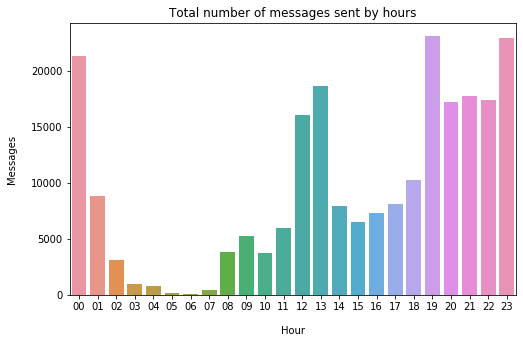

In [29]:
# Total number of messages sent by hour

plt.figure(figsize=(8,5))
sns.barplot(x="hour", y="id", data=hourPeriod)
plt.title('Total number of messages sent by hours', fontsize = 12)
plt.xlabel("Hour", labelpad=14)
plt.ylabel("Messages", labelpad=14)

In [30]:
yearHour = pd.DataFrame(df.groupby(['hour','year'])['id'].count())
yearHour = yearHour.reset_index()

In [31]:
yearHour

,hour,year,id
0,00,2017,11388
1,00,2018,6834
2,00,2019,1807
3,00,2020,1243
4,01,2017,6422
...,...,...,...
90,22,2020,1678
91,23,2017,10107
92,23,2018,8743
93,23,2019,3003


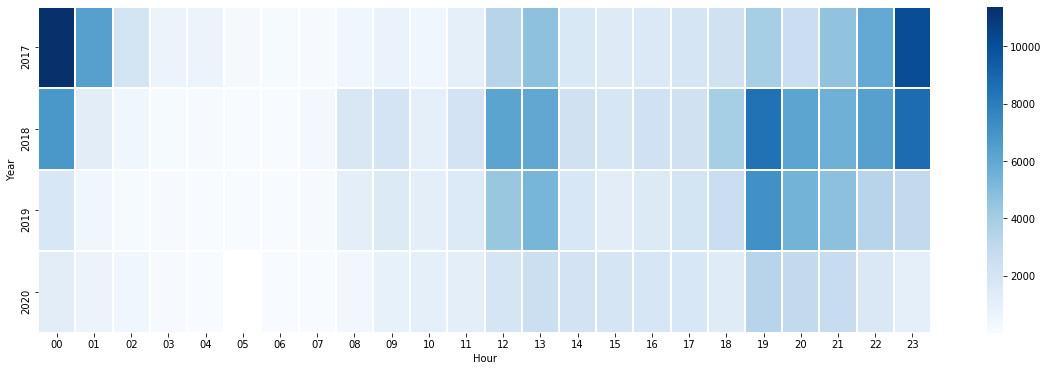

In [32]:
# heatmap of hours vs 4 years, by number of text messages

fig, ax = plt.subplots(figsize=(20,6))
heatmap_data = pd.pivot_table(yearHour, values='id', 
                     index=['year'], 
                     columns='hour')
sns.heatmap(heatmap_data, cmap='Blues',linewidths=1, ax=ax)

plt.xlabel("Hour") 
plt.ylabel("Year")
plt.show()